In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pathlib import Path
from scipy.stats import linregress

In [7]:
# File to Load (Remember to Change These)
sleep_health_data_to_load = Path("Resources/Sleep Health Lifestyle.csv")

# Read School and Student Data File and store into Pandas DataFrames
sleep_health_data = pd.read_csv(sleep_health_data_to_load)
sleep_health_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep (1-10),Physical Activity Level (1-100),Stress Level (1-10),BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


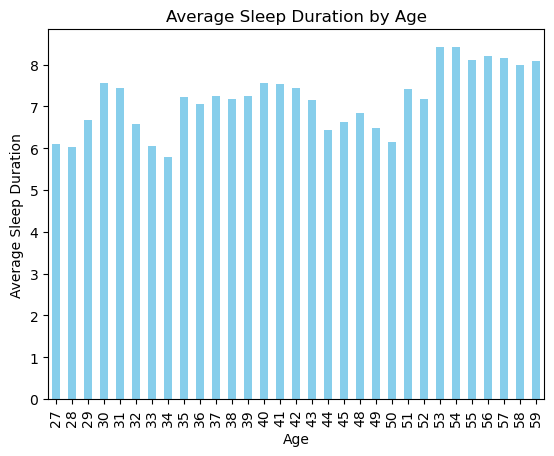

In [10]:
#Average Sleep Duration by Age - Bar Graph

sleep_bar = sleep_health_data.groupby('Age')['Sleep Duration'].mean()

sleep_bar.plot(kind='bar', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Average Sleep Duration')
plt.title('Average Sleep Duration by Age')
plt.show()

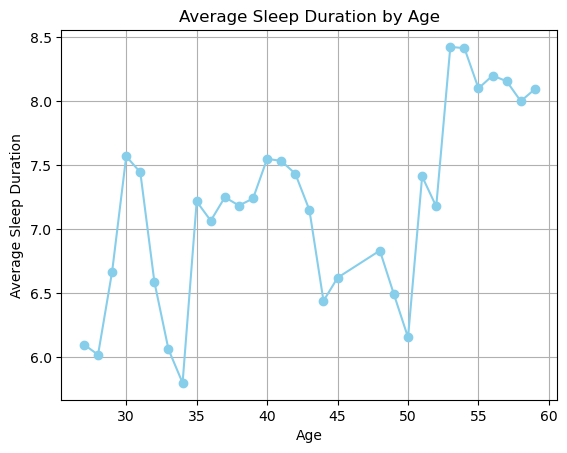

In [11]:

#Average Sleep Duration by Age - Line Graph


sleep_bar = sleep_health_data.groupby('Age')['Sleep Duration'].mean()

sleep_bar.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Average Sleep Duration')
plt.title('Average Sleep Duration by Age')
plt.grid(True)
plt.show()

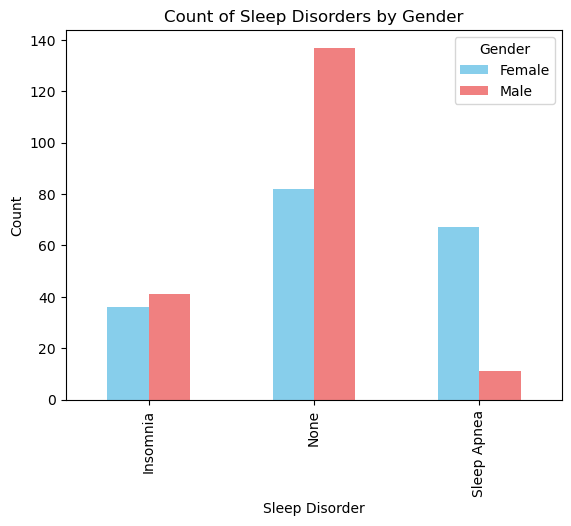

In [12]:

#Sleep Disorders by Gender - Clustered Bar Graph

sleep_health_data['Sleep Disorder'] = sleep_health_data['Sleep Disorder'].fillna('None')
sleep_bar = sleep_health_data.groupby(['Sleep Disorder', 'Gender']).size().unstack()

sleep_bar.plot(kind='bar', color=['skyblue', 'lightcoral'])  # Colors for each gender
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.title('Count of Sleep Disorders by Gender')
plt.show()

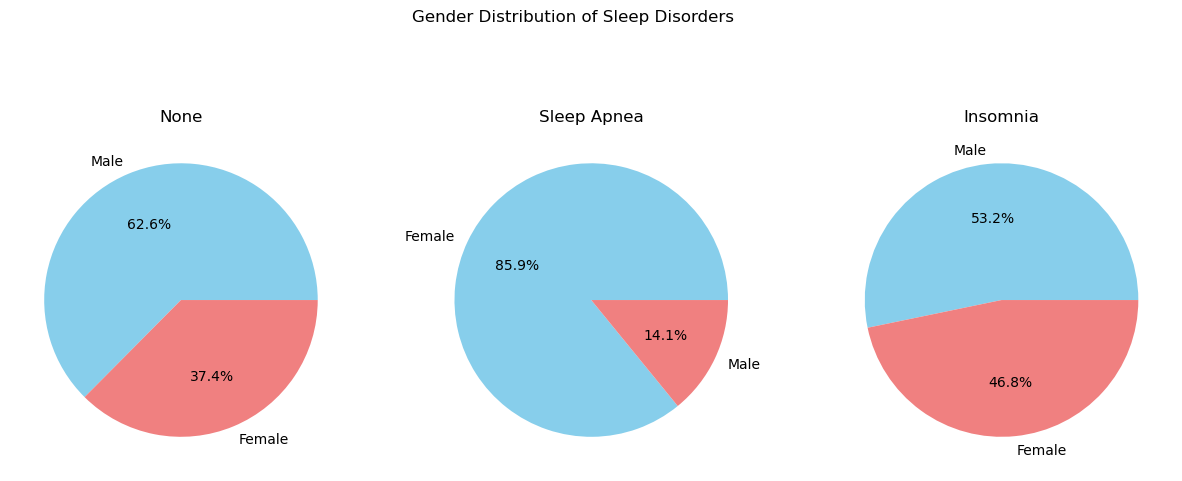

In [13]:
# Get unique sleep disorders
disorders = sleep_health_data['Sleep Disorder'].unique()

# Create subplots for each sleep disorder
fig, axes = plt.subplots(1, len(disorders), figsize=(15, 6))

for i, disorder in enumerate(disorders):
    gender_counts = sleep_health_data[sleep_health_data['Sleep Disorder'] == disorder]['Gender'].value_counts()
    axes[i].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    axes[i].set_title(disorder)

plt.suptitle('Gender Distribution of Sleep Disorders')
plt.show()